offsets:  [[1.0 2.0]
 [2.0 3.0]
 [3.0 5.0]
 [4.0 7.0]
 [5.0 11.0]]
sizes:  [ 20  50  80 200 500]


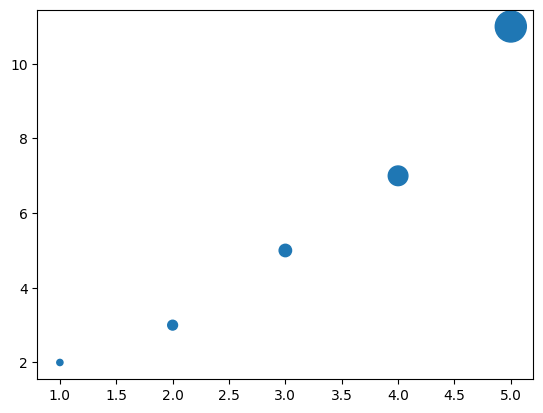

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 创建示例数据和图表
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
sizes = [20, 50, 80, 200, 500]

fig, ax = plt.subplots()
path_collection = ax.scatter(x, y, s=sizes)

# 从 PathCollection 中获取数据
offsets = path_collection.get_offsets()
sizes = path_collection.get_sizes()
print("offsets: ", offsets)
print("sizes: ", sizes)

# 将数据保存到文本文件
with open('path_collection_data.txt', 'w') as file:
    for i in range(len(offsets)):
        file.write(f'Point {i + 1}: x={offsets[i][0]}, y={offsets[i][1]}, size={sizes[i]}\n')

plt.show()

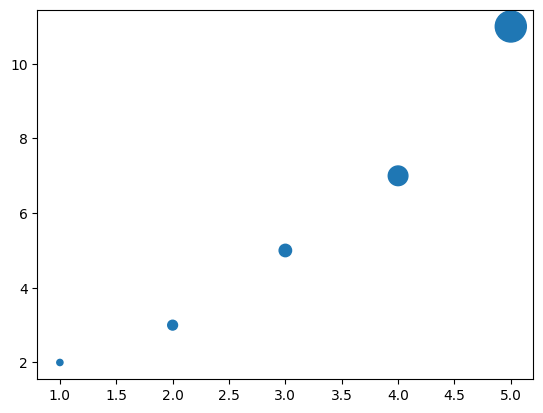

In [19]:
import matplotlib.pyplot as plt

# 从文件中加载数据
offsets = []
sizes = []
with open('path_collection_data.txt', 'r') as file:
    for line in file:
        parts = line.split(',')
        x = float(parts[0].split('=')[1])
        y = float(parts[1].split('=')[1])
        size = float(parts[2].split('=')[1])
        offsets.append([x, y])
        sizes.append(size)

# 创建新的散点图
fig, ax = plt.subplots()
path_collection = ax.scatter([offset[0] for offset in offsets], [offset[1] for offset in offsets], s=sizes)

plt.show()

paths:  (Path(array([[ 0.        , -0.5       ],
       [ 0.13260155, -0.5       ],
       [ 0.25978994, -0.44731685],
       [ 0.35355339, -0.35355339],
       [ 0.44731685, -0.25978994],
       [ 0.5       , -0.13260155],
       [ 0.5       ,  0.        ],
       [ 0.5       ,  0.13260155],
       [ 0.44731685,  0.25978994],
       [ 0.35355339,  0.35355339],
       [ 0.25978994,  0.44731685],
       [ 0.13260155,  0.5       ],
       [ 0.        ,  0.5       ],
       [-0.13260155,  0.5       ],
       [-0.25978994,  0.44731685],
       [-0.35355339,  0.35355339],
       [-0.44731685,  0.25978994],
       [-0.5       ,  0.13260155],
       [-0.5       ,  0.        ],
       [-0.5       , -0.13260155],
       [-0.44731685, -0.25978994],
       [-0.35355339, -0.35355339],
       [-0.25978994, -0.44731685],
       [-0.13260155, -0.5       ],
       [ 0.        , -0.5       ],
       [ 0.        , -0.5       ]]), array([ 1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,

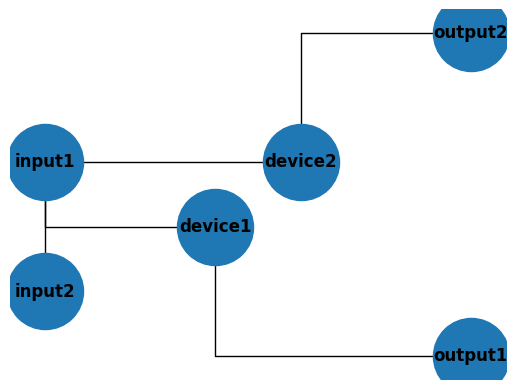

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection

# 创建一个空的图
G = nx.MultiDiGraph()

# 添加节点并指定位置和尺寸
nodes = {
    'input1': {'pos': (1, 5), 'size': 100, 'type': 'input'},
    'input2': {'pos': (1, 3), 'size': 120, 'type': 'input'},
    'device1': {'pos': (3, 4), 'size': 150, 'type': 'device'},
    'device2': {'pos': (4, 5), 'size': 130, 'type': 'device'},
    'output1': {'pos': (6, 2), 'size': 110, 'type': 'output'},
    'output2': {'pos': (6, 7), 'size': 140, 'type': 'output'}
}

for node, data in nodes.items():
    G.add_node(node, pos=data['pos'], size=data['size'], type=data['type'])

edges = [('input1', 'device1'), ('input2', 'device2'), ('device1', 'output1'), ('device2', 'output2')]
pos = {key: val['pos'] for key, val in nodes.items()}

for edge in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[edge], connectionstyle='Angle', arrows=True)

nx.draw(G, pos, with_labels=True, node_size=3000, font_weight='bold', font_size=12, arrowsize=20)

# 从 plt.gcf 中获取类型为 PathCollection 的对象
path_collections = plt.gcf().findobj(match=lambda x: isinstance(x, PathCollection))
for path_collection in path_collections:
    # print("path_collection: ", path_collection)
    paths_data = path_collection.get_paths()

    # print("path_collection.get_paths(): ")
    # print("path_collection.get_offsets(): ", path_collection.get_offsets())
    # print("path_collection.get_paths()[0].vertices: ", path_collection.get_paths()[0].vertices)
    # print("path_collection.get_paths()[0].codes: ", path_collection.get_paths()[0].codes)

    # 从 PathCollection 中获取数据
    paths = path_collection.get_paths()
    offsets = path_collection.get_offsets()
    sizes = path_collection.get_sizes()

    print("paths: ", paths)
    print("offsets: ", offsets)
    print("sizes: ", sizes)

    # 将数据保存到文本文件
    # with open('path_collection_data.txt', 'w') as file:
    #     for i in range(len(offsets)):
    #         file.write(f'Point {i + 1}: x={offsets[i][0]}, y={offsets[i][1]}, size={sizes[i]}\n')




In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 原始数据，假设格式为 (category, x, y, w, h)，其中 category 为 input, output, device 之一
data = [
    ('input', 1, 1, 1, 1),
    ('output', 3, 3, 1, 1),
    ('device', 2, 2, 1, 1)
]

# 创建一个无向图
G = nx.Graph()

# 添加节点和边
for category, x, y, w, h in data:
    G.add_node(category, pos=(x, y))
G.add_edge('input', 'device')
G.add_edge('device', 'output')

# 定义节点的位置
pos = {node: attrs['pos'] for node, attrs in G.nodes(data=True)}

# 绘制图形
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_weight='bold', font_size=12,
        arrows=False)

# 手动绘制连接线
for u, v in G.edges():
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    plt.annotate("", xy=(x1, y1), xytext=(x2, y2),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linestyle='dashed', color="black"))

plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义图形数据
data = [
    {
        "type": "input",
        "x": 0,
        "y": 0,
        "width": 100,
        "height": 100,
    },
    {
        "type": "device",
        "x": 100,
        "y": 0,
        "width": 200,
        "height": 200,
    },
    {
        "type": "output",
        "x": 200,
        "y": 0,
        "width": 100,
        "height": 100,
    },
]

# 创建图
G = nx.Graph()

# 添加节点
for node in data:
    G.add_node(node["type"], pos=(node["x"], node["y"]), width=node["width"], height=node["height"])

# 添加边
for node in data:
    if node["type"] == "input":
        for neighbor in data:
            if neighbor["type"] == "device":
                G.add_edge(node["type"], neighbor["type"])

# 绘制图
edges = nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, "pos"), arrows=True, connectionstyle="Angle")
nx.draw(G, pos=nx.get_node_attributes(G, "pos"), with_labels=True, node_color="lightblue", node_size=1500,
        font_weight="bold", font_size=12, arrowsize=20)

# 防止连接线相交
for edge in G.edges:
    if edge[0] == "input" and edge[1] == "device":
        # 计算 input 到 device 的直线路径
        path = nx.shortest_path(G, source=edge[0], target=edge[1])
        # 遍历路径，绘制折线连接线
        for i in range(1, len(path)):
            edges.append((path[i - 1], path[i]))

plt.show()

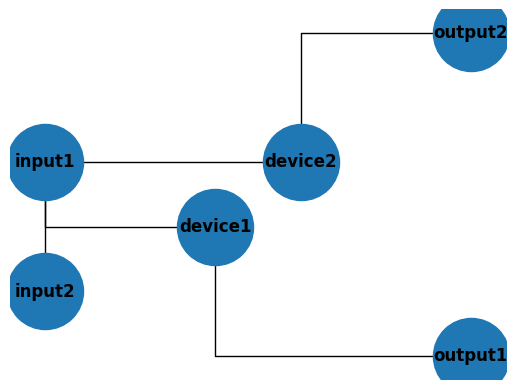

In [128]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个空的图
G = nx.MultiDiGraph()

# 添加节点并指定位置和尺寸
nodes = {
    'input1': {'pos': (1, 5), 'size': 100, 'type': 'input'},
    'input2': {'pos': (1, 3), 'size': 120, 'type': 'input'},
    'device1': {'pos': (3, 4), 'size': 150, 'type': 'device'},
    'device2': {'pos': (4, 5), 'size': 130, 'type': 'device'},
    'output1': {'pos': (6, 2), 'size': 110, 'type': 'output'},
    'output2': {'pos': (6, 7), 'size': 140, 'type': 'output'}
}

for node, data in nodes.items():
    G.add_node(node, pos=data['pos'], size=data['size'], type=data['type'])

# # 添加边，根据类别连接图形
# for u in nodes:
#     for v in nodes:
#         if nodes[u]['type'] == 'input' and nodes[v]['type'] == 'device':
#             G.add_edge(u, v)
#         elif nodes[u]['type'] == 'device' and nodes[v]['type'] == 'output':
#             G.add_edge(u, v)

# 将 nodes 中的 key 与 pos 单独提取
pos = nx.get_node_attributes(G, 'pos')

edges = [('input1', 'device1'), ('input2', 'device2'), ('device1', 'output1'), ('device2', 'output2')]
for edge in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[edge], connectionstyle='Angle', arrows=True)

# 绘制图并使用自定义布局
# pos = nx.get_node_attributes(G, 'pos')
edges = nx.draw_networkx_edges(G, pos, arrows=True, connectionstyle='Angle')  # 将 edgelist 参数设置为空列表

nx.draw(G, pos, with_labels=True, node_size=3000, font_weight='bold', font_size=12, arrowsize=20)
# nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', node_size=1500, font_weight='bold', font_size=12)

plt.show()

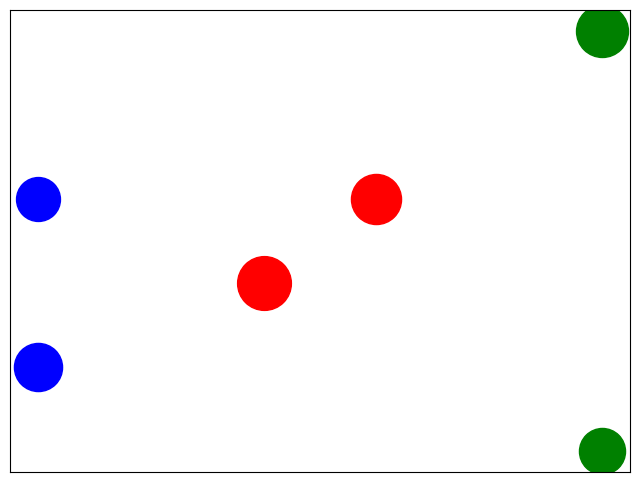

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

# 提供的测试数据
data = {
    'input1': {'pos': (1, 5), 'size': 100, 'type': 'input'},
    'input2': {'pos': (1, 3), 'size': 120, 'type': 'input'},
    'device1': {'pos': (3, 4), 'size': 150, 'type': 'device'},
    # 'device2': {'pos': (4, 2), 'size': 130, 'type': 'device'},
    'device2': {'pos': (4, 5), 'size': 130, 'type': 'device'},
    'output1': {'pos': (6, 2), 'size': 110, 'type': 'output'},
    'output2': {'pos': (6, 7), 'size': 140, 'type': 'output'}
}

# 创建一个无向图
G = nx.Graph()
# G = nx.MultiDiGraph()

# 添加节点和节点属性
for key, val in data.items():
    G.add_node(key, pos=val['pos'], size=val['size'], type=val['type'])

# 定义连接的边列表
edges = [('input1', 'device1'), ('input2', 'device2'), ('device1', 'output1'), ('device2', 'output2')]

# 添加边到图中
# G.add_edges_from(edges)
# nx.spring_layout(G)
# 获取节点的位置信息
positions = {key: val['pos'] for key, val in data.items()}

# 绘制图形
plt.figure(figsize=(8, 6))

# 绘制节点
node_colors = {'input': 'blue', 'output': 'green', 'device': 'red'}
node_sizes = [val['size'] * 10 for val in data.values()]  # 节点大小
node_types = nx.get_node_attributes(G, 'type')

for node_id in G.nodes():
    nx.draw_networkx_nodes(G, positions, nodelist=[node_id], node_color=node_colors[node_types[node_id]],
                           node_size=node_sizes[list(data.keys()).index(node_id)])

# 绘制边
for edge in edges:
    nx.draw_networkx_edges(G, positions, edgelist=[edge], connectionstyle='Angle', arrows=True)
    # edge_points[edge] = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot', args='-Gnodesep=1 -Goverlap=false',
    #                                                          root=edge[0])[edge[0]][edge[1]][1]['pos']
    # path = nx.shortest_path(G, edge[0], edge[1], weight='weight')
    # path_edges = list(zip(path, path[1:]))
    # points = [positions[node] for node in path_edges]
    # edge_points[edge] = points

# 添加标签
# nx.draw_networkx_labels(G, positions, font_size=12, font_color='black', font_weight='bold')


# plt.axis('off')
# plt.show()

# # 获取连线的数据
# gcf = plt.gcf().get_children()
# print("gcf: ", gcf)
# print("gcf[1]: ", gcf[1])
# gcf_children = gcf[1].get_children()
# print("gcf_children: ", gcf_children)
# lines = gcf[1].get_children()[0].get_paths()  # 获取连线的路径信息
# 
# # 输出连线的数据
# print("连线的数据：")
# for line in lines:
#     print(line.vertices)  # 输出连线的顶点坐标


gcf:  [<matplotlib.patches.Rectangle object at 0x0000012A5BD307C0>, <Axes:>]
gcf[1]:  Axes(0,0;1x1)
连线的数据：
[[ 0.         -0.5       ]
 [ 0.13260155 -0.5       ]
 [ 0.25978994 -0.44731685]
 [ 0.35355339 -0.35355339]
 [ 0.44731685 -0.25978994]
 [ 0.5        -0.13260155]
 [ 0.5         0.        ]
 [ 0.5         0.13260155]
 [ 0.44731685  0.25978994]
 [ 0.35355339  0.35355339]
 [ 0.25978994  0.44731685]
 [ 0.13260155  0.5       ]
 [ 0.          0.5       ]
 [-0.13260155  0.5       ]
 [-0.25978994  0.44731685]
 [-0.35355339  0.35355339]
 [-0.44731685  0.25978994]
 [-0.5         0.13260155]
 [-0.5         0.        ]
 [-0.5        -0.13260155]
 [-0.44731685 -0.25978994]
 [-0.35355339 -0.35355339]
 [-0.25978994 -0.44731685]
 [-0.13260155 -0.5       ]
 [ 0.         -0.5       ]
 [ 0.         -0.5       ]]


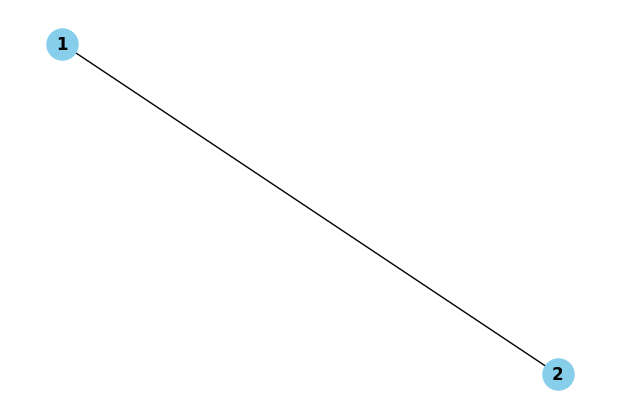

In [86]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个简单的图
G = nx.Graph()
# G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
G.add_edges_from([(1, 2)])

# 绘制图形
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_weight='bold')

# 获取连线的数据
gcf = plt.gcf().get_children()
print("gcf: ", gcf)
print("gcf[1]: ", gcf[1])
lines = gcf[1].get_children()[0].get_paths()  # 获取连线的路径信息

# 输出连线的数据
print("连线的数据：")
for line in lines:
    print(line.vertices)  # 输出连线的顶点坐标

TypeError: tuple indices must be integers or slices, not str

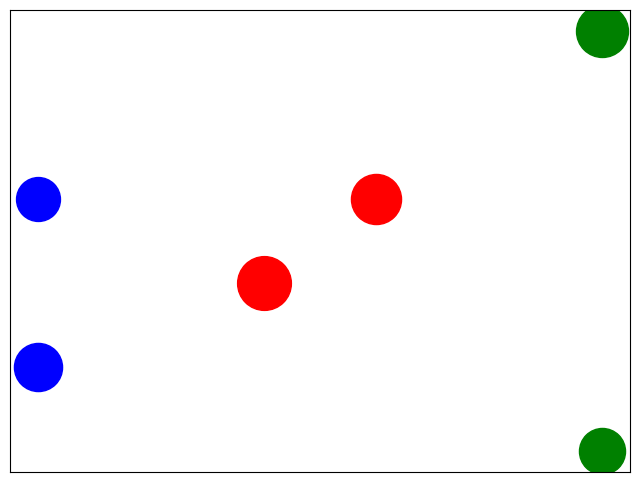

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# 提供的测试数据
data = {
    'input1': {'pos': (1, 5), 'size': 100, 'type': 'input'},
    'input2': {'pos': (1, 3), 'size': 120, 'type': 'input'},
    'device1': {'pos': (3, 4), 'size': 150, 'type': 'device'},
    'device2': {'pos': (4, 5), 'size': 130, 'type': 'device'},
    'output1': {'pos': (6, 2), 'size': 110, 'type': 'output'},
    'output2': {'pos': (6, 7), 'size': 140, 'type': 'output'}
}

# 创建一个无向图
G = nx.Graph()

# 添加节点和节点属性
for key, val in data.items():
    G.add_node(key, pos=val['pos'], size=val['size'], type=val['type'])

# 定义连接的边列表
edges = [('input1', 'device1'), ('input2', 'device2'), ('device1', 'output1'), ('device2', 'output2')]

# 添加边到图中
G.add_edges_from(edges)

# 获取节点的位置信息
positions = {key: val['pos'] for key, val in data.items()}

# 绘制图形
plt.figure(figsize=(8, 6))

# 绘制节点
node_colors = {'input': 'blue', 'output': 'green', 'device': 'red'}
node_sizes = [val['size'] * 10 for val in data.values()]  # 节点大小
node_types = nx.get_node_attributes(G, 'type')

for node_id in G.nodes():
    nx.draw_networkx_nodes(G, positions, nodelist=[node_id], node_color=node_colors[node_types[node_id]],
                           node_size=node_sizes[list(data.keys()).index(node_id)])

# 绘制边并获取折线点信息
edge_points = {}
for edge in edges:
    edge_points[edge] = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot', args='-Gnodesep=1 -Goverlap=false',
                                                             root=edge[0])[edge[0]][edge[1]][1]['pos']
    nx.draw_networkx_edges(G, positions, edgelist=[edge], connectionstyle='Angle', arrows=True)

# 添加标签
nx.draw_networkx_labels(G, positions, font_size=12, font_color='black', font_weight='bold')

plt.axis('off')
plt.show()

# 输出连接线的折线点信息
print("连接线的折线点信息：")
for edge, points in edge_points.items():
    print(f"连接线 {edge} 的折线点：{points}")
